In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# **1. Loading Dataset**

In [2]:
# Loading the data
new_data = pd.read_csv("/kaggle/input/seperated-data/India_Delhi.csv")

# print the shape
print(new_data.shape)

#runs the first 5 rows
new_data.head()

(2399, 12)


,Date,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
0,2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,NaN,NaN,NaN,NaN,India_Delhi
1,2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,NaN,NaN,NaN,NaN,India_Delhi
2,2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,NaN,NaN,NaN,NaN,India_Delhi
3,2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,NaN,NaN,NaN,NaN,India_Delhi
4,2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,NaN,NaN,NaN,NaN,India_Delhi


In [3]:
# Find the minimum and maximum dates
min_date = new_data['Date'].min()
max_date = new_data['Date'].max()

print('Minimum date:', min_date)
print('Maximum date:', max_date)

Minimum date: 2014-12-29
Maximum date: 2023-10-01


In [4]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2399 non-null   object 
 1   co            2399 non-null   float64
 2   no2           2399 non-null   float64
 3   o3            2399 non-null   float64
 4   pm10          2398 non-null   float64
 5   pm25          2398 non-null   float64
 6   so2           2399 non-null   float64
 7   humidity      1698 non-null   float64
 8   pressure      1698 non-null   float64
 9   temperature   1698 non-null   float64
 10  wind-speed    1629 non-null   float64
 11  Country_City  2399 non-null   object 
dtypes: float64(10), object(2)
memory usage: 225.0+ KB


In [5]:
new_data.describe()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed
count,2399.000000,2399.000000,2399.000000,2398.000000,2398.000000,2399.000000,1698.000000,1698.000000,1698.000000,1629.000000
mean,9.325594,16.870946,9.480700,131.572143,164.397832,5.702751,60.708304,985.184923,26.338869,1.101964
std,3.715709,7.805715,4.829603,77.174642,64.829240,2.289821,17.138084,10.022854,6.631277,0.493156
min,0.100000,5.000000,2.400000,12.000000,30.000000,1.700000,13.000000,743.000000,6.200000,0.300000
25%,7.050000,10.600000,6.000000,82.000000,123.000000,4.000000,48.500000,979.800000,22.100000,0.800000
50%,8.400000,15.800000,8.200000,120.000000,160.000000,5.300000,63.000000,983.900000,28.600000,1.000000
75%,10.700000,21.500000,11.800000,160.000000,189.000000,7.100000,74.000000,990.400000,31.100000,1.300000
max,30.600000,66.500000,40.300000,999.000000,577.000000,19.800000,99.100000,1020.500000,38.000000,4.600000


In [6]:
# Investigate all the elements whithin each Feature

for column in new_data:
    # Handle numerical and string columns differently
    if new_data[column].dtype == 'object':  # Check if column is of object type
        unique_vals = new_data[column].unique()  # pandas unique for strings
    else:
        unique_vals = np.unique(new_data[column])  # numpy unique for numerical types

    nr_values = len(unique_vals)
    if nr_values < 14:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Date :2397
The number of values for feature co :200
The number of values for feature no2 :328
The number of values for feature o3 :226
The number of values for feature pm10 :320
The number of values for feature pm25 :309
The number of values for feature so2 :116
The number of values for feature humidity :602
The number of values for feature pressure :300
The number of values for feature temperature :264
The number of values for feature wind-speed :33
The number of values for feature Country_City :1 -- ['India_Delhi']


In [7]:
new_data.isna().sum()

Date              0
co                0
no2               0
o3                0
pm10              1
pm25              1
so2               0
humidity        701
pressure        701
temperature     701
wind-speed      770
Country_City      0
dtype: int64

# **1.2 - Function**

In [8]:
print(os.listdir('/kaggle/usr/lib/function'))

['__script__.py', '__results__.html', '__script__.ipynb', 'function.py', '__output__.json', 'custom.css']


In [9]:
import sys
sys.path.append("/kaggle/usr/lib/function")  # Add directory to the path

import function as fn

In [10]:
# Use the functions
new_data1 = fn.prepare_datetime_index(new_data, date_column='Date')
new_data1.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
Date,,,,,,,,,,,
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,NaN,NaN,NaN,NaN,India_Delhi
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,NaN,NaN,NaN,NaN,India_Delhi
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,NaN,NaN,NaN,NaN,India_Delhi
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,NaN,NaN,NaN,NaN,India_Delhi
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,NaN,NaN,NaN,NaN,India_Delhi


In [11]:
# Use the functions
new_data2 = fn.fill_pollutant_values(new_data1)
print(new_data2.isna().sum())

co              0
no2             0
o3              0
pm10            0
pm25            0
so2             0
humidity        0
pressure        0
temperature     0
wind-speed      0
Country_City    0
dtype: int64


**Check**

In [12]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data2.index.min(), end=new_data2.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data2.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex(['2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
               '2015-07-10', '2015-07-11', '2015-07-12', '2015-07-13',
               '2015-07-14', '2015-07-15',
               ...
               '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21',
               '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
               '2022-03-26', '2022-03-27'],
              dtype='datetime64[ns]', length=802, freq=None)


In [13]:
new_data3 = fn.impute_missing_dates(new_data2)

In [14]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data3.index.min(), end=new_data3.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data3.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [15]:
duplicates = new_data3.index[new_data3.index.duplicated()]
print(f"Duplicate indexes: {duplicates}")

Duplicate indexes: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


# **1.3.Normal AQI count, After Normal AQI count Smoothing AQI(IQR, Z-score, Rolling), (Preprocess Pollution --> Smooth Pollution --> Calculate smooth aqi).**

In [16]:
new_data4 = fn.calculate_aqi(new_data3, subindex_columns=['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'])

In [17]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0


In [18]:
new_data4.shape

(3199, 13)

 After Normal AQI count Smoothing AQI(IQR, Z-score, Rolling)

In [19]:
# Apply the outlier handling function to the 'AQI' column only
new_data4['AQI_smoothed_iqr'] = fn.handle_aqi_outliers(new_data4['AQI'], method='iqr')
new_data4['AQI_smoothed_zscore'] = fn.handle_aqi_outliers(new_data4['AQI'], method='zscore')
new_data4['AQI_smoothed_rolling'] = fn.handle_aqi_outliers(new_data4['AQI'], method='rolling')

In [20]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0,307.0,307.0,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0,367.0,367.0,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0,202.0,202.0,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0,382.0,158.0,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0,172.0,172.0,172.0


(Preprocess Pollution --> Smooth Pollution --> Calculate smooth aqi)

In [21]:
new_smooth = fn.calculate_smooth_aqi(new_data3, columns=['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'])
new_smooth.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,AQI_Smooth
2014-12-29,15.70,35.883333,5.366667,182.333333,268.166667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,268.166667
2014-12-30,15.70,35.883333,5.366667,182.333333,268.166667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,268.166667
2014-12-31,15.70,35.883333,5.366667,182.333333,268.166667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,268.166667
2015-01-01,15.70,35.883333,5.366667,182.333333,268.166667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,268.166667
2015-01-02,15.45,33.100000,5.816667,166.000000,249.500000,5.733333,60.691097,985.187382,26.3352,1.102459,India_Delhi,249.500000


**AQI (normal, smooth_iqr, smooth_zscore, smooth_rolling, smooth)**

<Axes: >

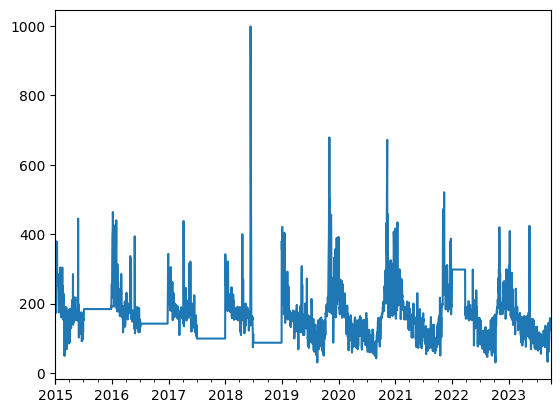

In [22]:
#normal
aqi_normal = new_data4['AQI']
aqi_normal.plot()

<Axes: >

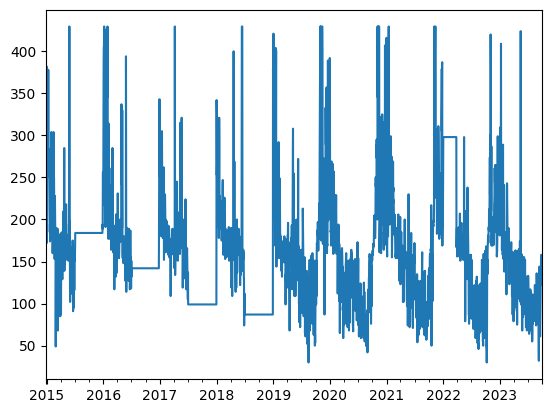

In [23]:
#smooth_iqr
aqi_smooth_iqr = new_data4['AQI_smoothed_iqr']
aqi_smooth_iqr.plot()

<Axes: >

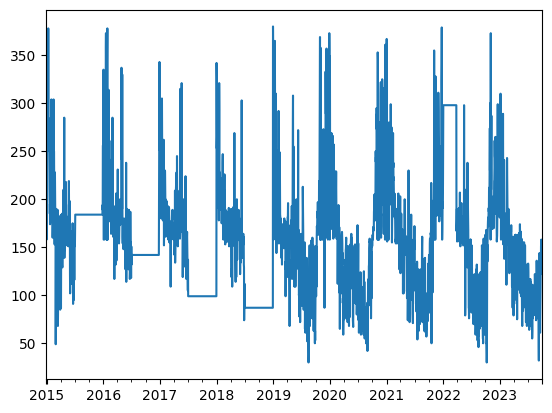

In [24]:
#smooth_zscore
aqi_smooth_zscore = new_data4['AQI_smoothed_zscore']
aqi_smooth_zscore.plot()

<Axes: >

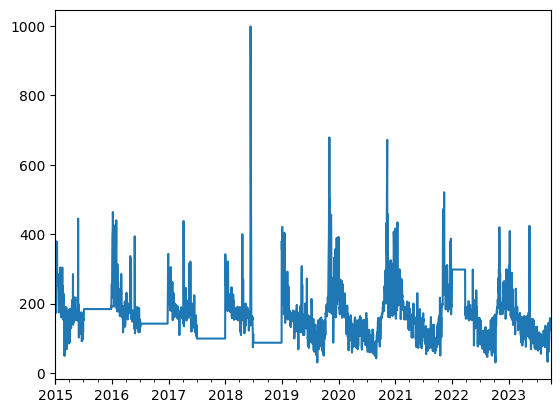

In [25]:
#smooth_rolling
aqi_smooth_rolling = new_data4['AQI_smoothed_rolling']
aqi_smooth_rolling.plot()

<Axes: >

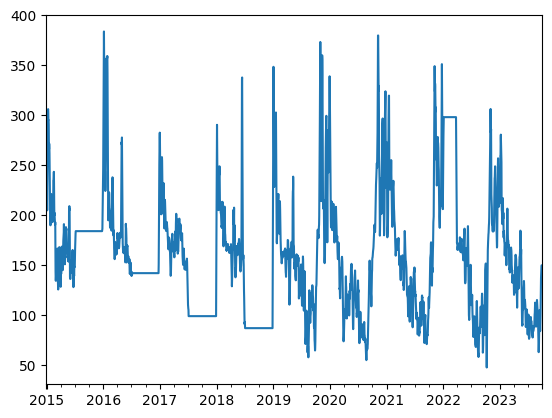

In [26]:
#smooth
aqi_smooth = new_smooth['AQI_Smooth']
aqi_smooth.plot()

# **2.1. Splitting & Preprocessing the Raw Data(AQI_Smooth)**

Smooth AQI(All Pollutants)

In [27]:
new_smooth.head(8)

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,AQI_Smooth
2014-12-29,15.700000,35.883333,5.366667,182.333333,268.166667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,268.166667
2014-12-30,15.700000,35.883333,5.366667,182.333333,268.166667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,268.166667
2014-12-31,15.700000,35.883333,5.366667,182.333333,268.166667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,268.166667
2015-01-01,15.700000,35.883333,5.366667,182.333333,268.166667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,268.166667
2015-01-02,15.450000,33.100000,5.816667,166.000000,249.500000,5.733333,60.691097,985.187382,26.3352,1.102459,India_Delhi,249.500000
2015-01-03,14.266667,30.150000,6.416667,130.000000,219.166667,5.183333,60.691097,985.187382,26.3352,1.102459,India_Delhi,219.166667
2015-01-04,14.566667,29.766667,6.250000,131.333333,220.166667,4.716667,60.691097,985.187382,26.3352,1.102459,India_Delhi,220.166667
2015-01-05,14.066667,25.683333,6.166667,126.000000,204.833333,3.783333,60.691097,985.187382,26.3352,1.102459,India_Delhi,204.833333


In [28]:
new_smooth.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'AQI_Smooth'],
      dtype='object')

***Working with AQI_Smooth***

<Axes: >

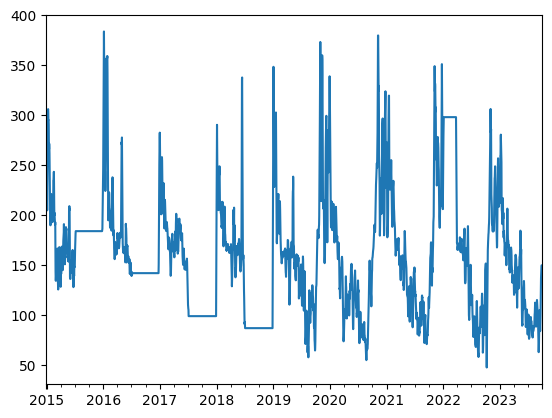

In [29]:
aqi_smooth.plot()

In [30]:
# Function to define window_size and convert data into X (features) and y (labels)
def new_data_to_X_y(new_data, window_size, train_pct, val_pct, test_pct):
    # Convert data to numpy array
    new_data_as_np = new_data.to_numpy()
    
    # Split data based on percentages
    total_len = len(new_data_as_np)
    train_end = int(train_pct * total_len)
    val_end = train_end + int(val_pct * total_len)
    
    # Prepare train, val, and test splits
    train_data = new_data_as_np[:train_end]
    val_data = new_data_as_np[train_end:val_end]
    test_data = new_data_as_np[val_end:]
    
    # Helper function to create X and y
    def create_X_y(data):
        X, y = [], []
        for i in range(len(data) - window_size):
            row = [[a] for a in data[i:i + window_size]]
            X.append(row)
            label = data[i + window_size]
            y.append(label)
        return np.array(X), np.array(y)
    
    # Create X and y for train, validation, and test
    X_train, y_train = create_X_y(train_data)
    X_val, y_val = create_X_y(val_data)
    X_test, y_test = create_X_y(test_data)
    
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

In [31]:
#passing data to function

# WINDOW_SIZE = 6
# train_pct=0.7
# val_pct=0.2
# test_pct=0.1
(X_train1, y_train1), (X_val1, y_val1), (X_test1, y_test1) = new_data_to_X_y(aqi_smooth, 6, 0.7, 0.2, 0.1)

# shapes
print("Train shapes:", X_train1.shape, y_train1.shape)
print("Validation shapes:", X_val1.shape, y_val1.shape)
print("Test shapes:", X_test1.shape, y_test1.shape)

Train shapes: (2233, 6, 1) (2233,)
Validation shapes: (633, 6, 1) (633,)
Test shapes: (315, 6, 1) (315,)


# **2.2. Model Training & Testing**

In [32]:
# libraries for building model and testing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# LSTM(Smooth)

In [33]:
model1 = Sequential()
model1.add(InputLayer((6, 1))) # 6 timestamp , 1 feature
model1.add(LSTM(32)) # LSTM layer with 16 units
model1.add(Dense(8, activation='relu')) # activation function- ReLU with 8 dense layer

model1.add(Dense(1, 'linear')) # output - linear and data- 1

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 32)                  │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,625 (18.07 KB)

 Trainable params: 4,625 (18.07 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
cp1 = ModelCheckpoint('/kaggle/working/model1.keras', save_best_only=True)

model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[RootMeanSquaredError()])

In [35]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp1])

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 29629.2734 - root_mean_squared_error: 172.1152 - val_loss: 32966.5938 - val_root_mean_squared_error: 181.5670
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28629.2559 - root_mean_squared_error: 169.1957 - val_loss: 32102.5410 - val_root_mean_squared_error: 179.1718
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26919.2773 - root_mean_squared_error: 164.0415 - val_loss: 30709.6367 - val_root_mean_squared_error: 175.2417
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26250.6484 - root_mean_squared_error: 162.0051 - val_loss: 28041.9082 - val_root_mean_squared_error: 167.4572
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23281.8477 - root_mean_squared_error: 152.5624 - val_loss: 25575.4492 - val_root_mean_squared_error: 159.9233
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21000.8477 - root_mean_squared_error: 144.9106 - val_loss: 23433.0996 - val_root_mean_squared_er

In [36]:
from tensorflow.keras.models import load_model
model1 = load_model('/kaggle/working/model1.keras')

In [37]:
# Evaluate the model on the train data
train_result = model1.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 4.1498
Mean Squared Error (MSE): 55.1649
Root Mean Squared Error (RMSE): 7.4273
R-squared (Accuracy): 0.9829


In [38]:
# Evaluate the model on the validation data
val_result = model1.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 5.0458
Mean Squared Error (MSE): 47.1329
Root Mean Squared Error (RMSE): 6.8653
R-squared (Accuracy): 0.9916


In [39]:
# Evaluate the model on the test data
test_result = model1.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 4.8111
Mean Squared Error (MSE): 47.1017
Root Mean Squared Error (RMSE): 6.8631
R-squared (Accuracy): 0.9813


In [40]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Train Predictions,Actuals
0,199.536560,220.166667
1,223.862625,204.833333
2,195.449554,220.666667
3,236.085114,244.666667
4,265.383240,257.166667
...,...,...
2228,196.199890,203.666667
2229,213.012665,220.333333
2230,234.891647,227.500000
2231,233.984909,229.333333


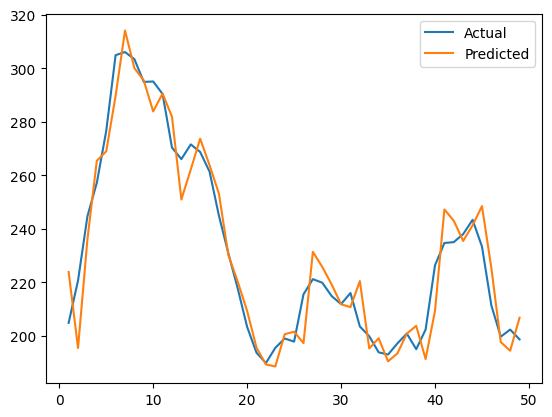

In [41]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [42]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,203.885941,198.333333
1,195.009048,194.000000
2,192.006622,192.333333
3,191.982193,189.166667
4,187.556763,187.166667
...,...,...
628,211.358261,211.666667
629,212.573914,207.000000
630,204.336349,190.833333
631,182.049362,190.833333


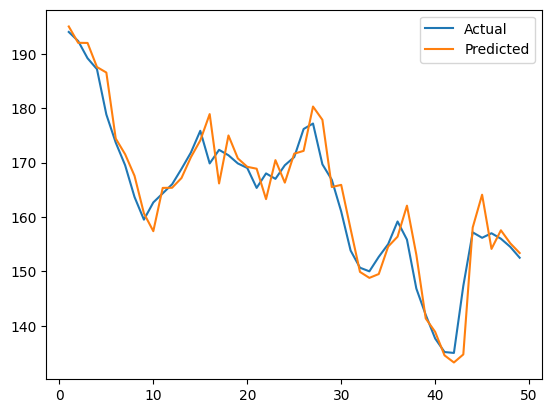

In [43]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [44]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,188.992844,187.166667
1,186.478333,183.833333
2,182.261765,184.833333
3,186.307800,187.500000
4,189.790710,192.500000
...,...,...
310,144.312027,149.166667
311,153.146057,149.833333
312,149.556534,149.666667
313,149.157639,149.666667


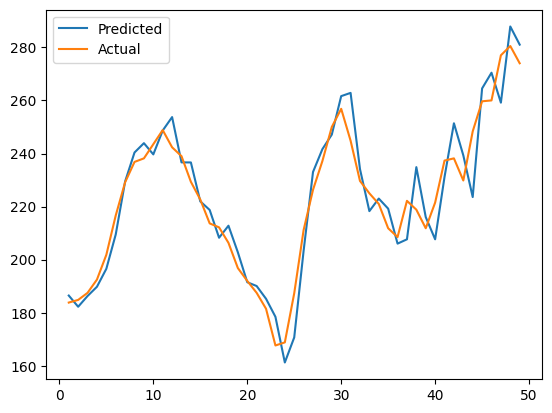

In [45]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

# GRU(Smooth)

In [46]:
model2 = Sequential()
model2.add(InputLayer((6, 1)))
model2.add(GRU(32))
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 32)                  │           3,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,633 (14.19 KB)

 Trainable params: 3,633 (14.19 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
cp2 = ModelCheckpoint('/kaggle/working/model2.keras', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[RootMeanSquaredError()])

In [48]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), 
           epochs=100, callbacks=[cp2])

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 28861.1387 - root_mean_squared_error: 169.8785 - val_loss: 32406.9863 - val_root_mean_squared_error: 180.0194
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28463.5820 - root_mean_squared_error: 168.6959 - val_loss: 31704.2969 - val_root_mean_squared_error: 178.0570
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26833.4219 - root_mean_squared_error: 163.7789 - val_loss: 30341.2832 - val_root_mean_squared_error: 174.1875
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26048.5586 - root_mean_squared_error: 161.3768 - val_loss: 29303.3867 - val_root_mean_squared_error: 171.1823
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24749.7344 - root_mean_squared_error: 157.3131 - val_loss: 27749.5488 - val_root_mean_squared_error: 166.5820
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23868.8789 - root_mean_squared_error: 154.4698 - val_loss: 26173.5469 - val_root_mean_squared_er

In [49]:
from tensorflow.keras.models import load_model
model2 = load_model('/kaggle/working/model2.keras')

In [50]:
# Evaluate the model on the train data
train_result = model2.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 4.1486
Mean Squared Error (MSE): 54.8655
Root Mean Squared Error (RMSE): 7.4071
R-squared (Accuracy): 0.9830


In [51]:
# Evaluate the model on the validation data
val_result = model2.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 4.8933
Mean Squared Error (MSE): 45.2695
Root Mean Squared Error (RMSE): 6.7283
R-squared (Accuracy): 0.9919


In [52]:
# Evaluate the model on the test data
test_result = model2.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 4.7336
Mean Squared Error (MSE): 45.2857
Root Mean Squared Error (RMSE): 6.7295
R-squared (Accuracy): 0.9820


In [53]:
train_predictions = model2.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Train Predictions,Actuals
0,202.168442,220.166667
1,225.363174,204.833333
2,199.450745,220.666667
3,233.503235,244.666667
4,260.767670,257.166667
...,...,...
2228,195.571823,203.666667
2229,210.948196,220.333333
2230,231.311508,227.500000
2231,230.858948,229.333333


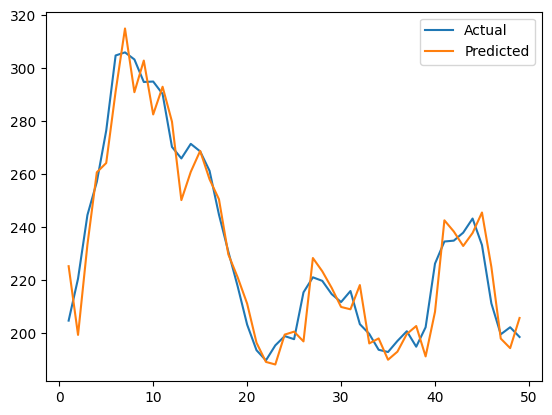

In [54]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [55]:
val_predictions = model2.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,202.768311,198.333333
1,194.761200,194.000000
2,191.741089,192.333333
3,191.577957,189.166667
4,187.402924,187.166667
...,...,...
628,213.285431,211.666667
629,212.802795,207.000000
630,203.942032,190.833333
631,182.188156,190.833333


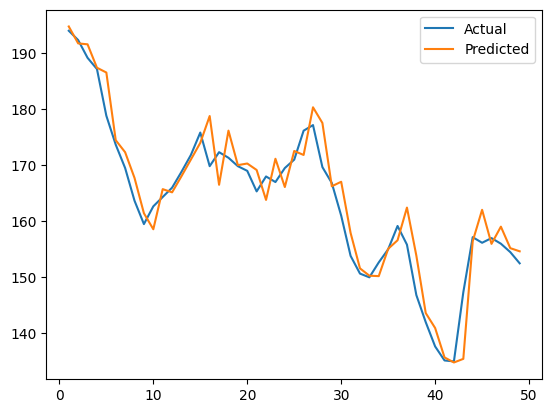

In [56]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [57]:
test_predictions = model2.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,188.820343,187.166667
1,186.525345,183.833333
2,182.241669,184.833333
3,186.253815,187.500000
4,189.232941,192.500000
...,...,...
310,145.196930,149.166667
311,153.050308,149.833333
312,149.757599,149.666667
313,150.677811,149.666667


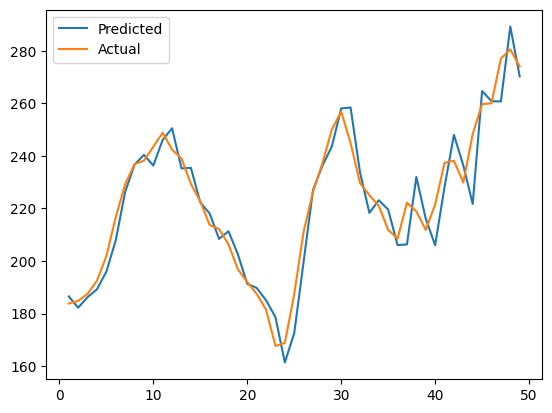

In [58]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

# RNN(Smooth)

In [59]:
model3 = Sequential()
model3.add(InputLayer((6, 1)))
model3.add(SimpleRNN(32))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,361 (5.32 KB)

 Trainable params: 1,361 (5.32 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
cp3 = ModelCheckpoint('/kaggle/working/model3.keras', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[RootMeanSquaredError()])

In [61]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), 
           epochs=100, callbacks=[cp3])

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 28647.4551 - root_mean_squared_error: 169.2358 - val_loss: 32950.3125 - val_root_mean_squared_error: 181.5222
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28680.0117 - root_mean_squared_error: 169.3320 - val_loss: 32733.8672 - val_root_mean_squared_error: 180.9250
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29084.0039 - root_mean_squared_error: 170.5289 - val_loss: 32468.8750 - val_root_mean_squared_error: 180.1912
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27902.0801 - root_mean_squared_error: 167.0097 - val_loss: 32154.6504 - val_root_mean_squared_error: 179.3172
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28006.2754 - root_mean_squared_error: 167.3377 - val_loss: 31786.2754 - val_root_mean_squared_error: 178.2871
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28326.1914 - root_mean_squared_error: 168.2923 - val_loss: 31366.0059 - val_root_mean_squared_er

In [62]:
from tensorflow.keras.models import load_model
model3 = load_model('/kaggle/working/model3.keras')

In [63]:
# Evaluate the model on the train data
train_result = model3.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 6.8160
Mean Squared Error (MSE): 240.7947
Root Mean Squared Error (RMSE): 15.5176
R-squared (Accuracy): 0.9256


In [64]:
# Evaluate the model on the validation data
val_result = model3.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 12.4673
Mean Squared Error (MSE): 416.5960
Root Mean Squared Error (RMSE): 20.4107
R-squared (Accuracy): 0.9258


In [65]:
# Evaluate the model on the test data
test_result = model3.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 5.2357
Mean Squared Error (MSE): 54.3196
Root Mean Squared Error (RMSE): 7.3702
R-squared (Accuracy): 0.9785


In [66]:
train_predictions = model3.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Train Predictions,Actuals
0,196.221329,220.166667
1,229.092789,204.833333
2,186.620880,220.666667
3,237.250000,244.666667
4,246.716934,257.166667
...,...,...
2228,194.320435,203.666667
2229,209.922424,220.333333
2230,229.868561,227.500000
2231,226.860550,229.333333


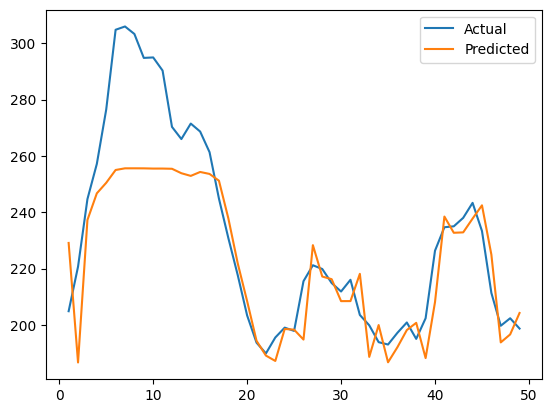

In [67]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [68]:
val_predictions = model3.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Train Predictions,Actuals
0,204.001862,198.333333
1,191.178543,194.000000
2,190.496399,192.333333
3,189.765472,189.166667
4,185.630936,187.166667
...,...,...
628,215.738815,211.666667
629,207.778061,207.000000
630,203.624786,190.833333
631,180.129395,190.833333


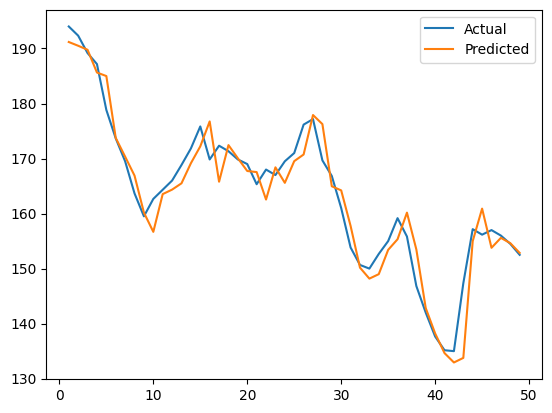

In [69]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [70]:
test_predictions = model3.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Train Predictions,Actuals
0,187.058640,187.166667
1,184.957504,183.833333
2,180.937424,184.833333
3,184.703171,187.500000
4,187.886780,192.500000
...,...,...
310,142.997818,149.166667
311,150.702011,149.833333
312,149.060059,149.666667
313,148.334229,149.666667


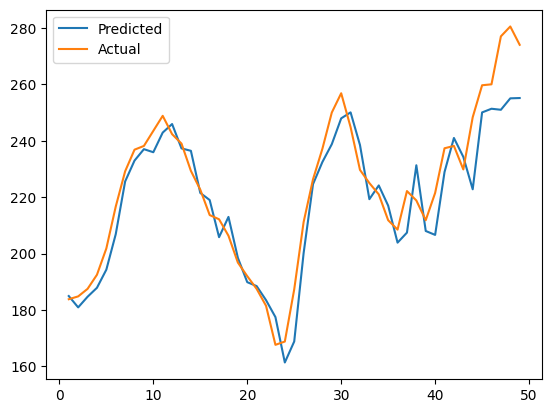

In [71]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()